# Data Exploration for Credit Scoring Analysis

This notebook explores the accepted and rejected loan datasets to understand their structure, missing values, and basic statistics.

## 1. Setup and Data Loading

In [76]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the 'src' directory to the path
sys.path.append(os.path.abspath('../src'))  # Adjust the path to point to the src folder

# Now import your function from data_utils.py
from utils import dataset_statistics

# Set display options for better visibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [77]:
# Load the three datasets with different missing data mechanisms
data_mar = pd.read_csv('../data_mar.csv')
data_mcar = pd.read_csv('../data_mcar.csv')
data_mnar = pd.read_csv('../data_mnar.csv')

## 2. Dataset Analysis

### 2.1 MAR Dataset Analysis

In [78]:
print("Missing at Random DATASET EXPLORATION")
print("="*80)
print(f"\nDataset Shape: {data_mar.shape}")

print("\nColumn Types:")
print(data_mar.dtypes)

print("\nMissing Values Analysis:")
missing_accepted = pd.DataFrame({
    'Column': data_mar.columns,
    'Data Type': data_mar.dtypes,
    'Missing Values': data_mar.isnull().sum(),
    'Missing Percentage': (data_mar.isnull().sum() / len(data_mar) * 100).round(2)
})
print(missing_accepted.sort_values('Missing Percentage', ascending=False))

# Get frequency of distinct values in the 'loan_status' column
value_counts = data_mar['feature_1'].value_counts()

# Print the value counts
print("Frequency of distinct values in 'feature_1':")
print(value_counts)

print("\nSample of missing at random (first 5 rows):")
data_mar.head()



Missing at Random DATASET EXPLORATION

Dataset Shape: (1000, 11)

Column Types:
feature_0    float64
feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
feature_5    float64
feature_6    float64
feature_7    float64
feature_8    float64
feature_9    float64
target       float64
dtype: object

Missing Values Analysis:
              Column Data Type  Missing Values  Missing Percentage
feature_0  feature_0   float64             200                20.0
feature_1  feature_1   float64               0                 0.0
feature_2  feature_2   float64               0                 0.0
feature_3  feature_3   float64               0                 0.0
feature_4  feature_4   float64               0                 0.0
feature_5  feature_5   float64               0                 0.0
feature_6  feature_6   float64               0                 0.0
feature_7  feature_7   float64               0                 0.0
feature_8  feature_8   float64               0

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,0.224515,0.648598,2.805591,0.569525,2.676771,0.685312,0.306675,1.147291,2.145905,2.477879,1.0
1,1.038548,1.316803,2.303387,1.233593,4.972675,1.086905,3.548788,0.342810,0.469005,2.787109,1.0
2,1.148988,1.794382,2.835693,1.114858,1.247120,1.899268,0.381470,0.837209,0.163223,0.997959,1.0
3,1.177318,2.420294,0.363514,1.086646,2.824750,2.722123,0.225266,0.515079,3.317272,2.801517,1.0
4,1.346717,0.089373,2.056613,0.428365,0.285387,1.140716,0.721945,1.110152,2.426608,0.880496,0.0


### 2.2 MCAR Dataset Analysis

In [79]:
print("Missing at Completely Random DATASET EXPLORATION")
print("="*80)
print(f"\nDataset Shape: {data_mcar.shape}")

print("\nColumn Types:")
print(data_mcar.dtypes)

print("\nMissing Values Analysis:")
missing_accepted = pd.DataFrame({
    'Column': data_mcar.columns,
    'Data Type': data_mcar.dtypes,
    'Missing Values': data_mcar.isnull().sum(),
    'Missing Percentage': (data_mcar.isnull().sum() / len(data_mcar) * 100).round(2)
})
print(missing_accepted.sort_values('Missing Percentage', ascending=False))

# Get frequency of distinct values in the 'loan_status' column
value_counts = data_mcar['feature_1'].value_counts()

# Print the value counts
print("Frequency of distinct values in 'feature_1':")
print(value_counts)

print("\nSample of missing at random (first 5 rows):")
data_mcar.head()



Missing at Completely Random DATASET EXPLORATION

Dataset Shape: (1000, 11)

Column Types:
feature_0    float64
feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
feature_5    float64
feature_6    float64
feature_7    float64
feature_8    float64
feature_9    float64
target       float64
dtype: object

Missing Values Analysis:
              Column Data Type  Missing Values  Missing Percentage
feature_0  feature_0   float64             225                22.5
feature_1  feature_1   float64               0                 0.0
feature_2  feature_2   float64               0                 0.0
feature_3  feature_3   float64               0                 0.0
feature_4  feature_4   float64               0                 0.0
feature_5  feature_5   float64               0                 0.0
feature_6  feature_6   float64               0                 0.0
feature_7  feature_7   float64               0                 0.0
feature_8  feature_8   float64     

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,0.224515,0.648598,2.805591,0.569525,2.676771,0.685312,0.306675,1.147291,2.145905,2.477879,1.0
1,1.038548,1.316803,2.303387,1.233593,4.972675,1.086905,3.548788,0.342810,0.469005,2.787109,1.0
2,1.148988,1.794382,2.835693,1.114858,1.247120,1.899268,0.381470,0.837209,0.163223,0.997959,1.0
3,1.177318,2.420294,0.363514,1.086646,2.824750,2.722123,0.225266,0.515079,3.317272,2.801517,1.0
4,NaN,0.089373,2.056613,0.428365,0.285387,1.140716,0.721945,1.110152,2.426608,0.880496,0.0


### 2.3 MNAR Dataset Analysis

In [80]:
print("Missing not at Random DATASET EXPLORATION")
print("="*80)
print(f"\nDataset Shape: {data_mnar.shape}")

print("\nColumn Types:")
print(data_mnar.dtypes)

print("\nMissing Values Analysis:")
missing_accepted = pd.DataFrame({
    'Column': data_mnar.columns,
    'Data Type': data_mnar.dtypes,
    'Missing Values': data_mnar.isnull().sum(),
    'Missing Percentage': (data_mnar.isnull().sum() / len(data_mnar) * 100).round(2)
})
print(missing_accepted.sort_values('Missing Percentage', ascending=False))

# Get frequency of distinct values in the 'loan_status' column
value_counts = data_mnar['target'].value_counts()

# Print the value counts
print("Frequency of distinct values in 'target':")
print(value_counts)

print("\nSample of missing at random (first 5 rows):")
data_mnar.head()



Missing not at Random DATASET EXPLORATION

Dataset Shape: (1000, 11)

Column Types:
feature_0    float64
feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
feature_5    float64
feature_6    float64
feature_7    float64
feature_8    float64
feature_9    float64
target       float64
dtype: object

Missing Values Analysis:
              Column Data Type  Missing Values  Missing Percentage
target        target   float64             211                21.1
feature_0  feature_0   float64               0                 0.0
feature_1  feature_1   float64               0                 0.0
feature_2  feature_2   float64               0                 0.0
feature_3  feature_3   float64               0                 0.0
feature_4  feature_4   float64               0                 0.0
feature_5  feature_5   float64               0                 0.0
feature_6  feature_6   float64               0                 0.0
feature_7  feature_7   float64            

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,0.224515,0.648598,2.805591,0.569525,2.676771,0.685312,0.306675,1.147291,2.145905,2.477879,1.0
1,1.038548,1.316803,2.303387,1.233593,4.972675,1.086905,3.548788,0.342810,0.469005,2.787109,1.0
2,1.148988,1.794382,2.835693,1.114858,1.247120,1.899268,0.381470,0.837209,0.163223,0.997959,1.0
3,1.177318,2.420294,0.363514,1.086646,2.824750,2.722123,0.225266,0.515079,3.317272,2.801517,1.0
4,1.346717,0.089373,2.056613,0.428365,0.285387,1.140716,0.721945,1.110152,2.426608,0.880496,0.0


## 3. Missing Values Visualization

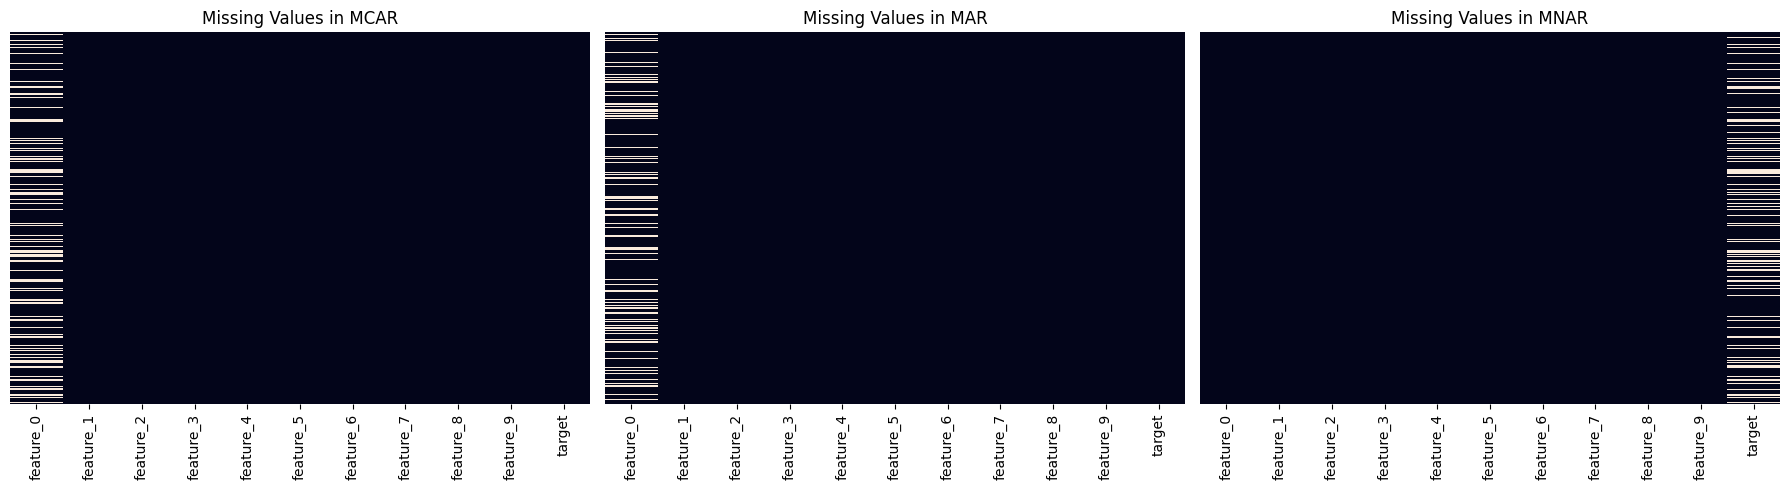

In [39]:

plt.figure(figsize=(18, 5))  # Adjusted figure size for better spacing

# 1st subplot
plt.subplot(1, 3, 1)  
sns.heatmap(data_mcar.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values in MCAR')

# 2nd subplot
plt.subplot(1, 3, 2)  
sns.heatmap(data_mar.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values in MAR')

# 3rd subplot
plt.subplot(1, 3, 3)  
sns.heatmap(data_mnar.isnull(), yticklabels=False, cbar=False)
plt.title('Missing Values in MNAR')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## 4. Basic Statistics

BASIC STATISTICS

Statistics for MCAR:

MCAR Dataset:
--------------------------------------------------
Total entries: 1000
Total missing values: 225
Missing value percentage: 22.50%
Mean of numeric columns:
feature_0    1.463046
feature_1    1.567074
feature_2    1.717891
feature_3    1.572873
feature_4    2.800319
feature_5    1.562181
feature_6    1.621417
feature_7    1.502517
feature_8    1.485106
feature_9    2.040264
target       0.500000
dtype: float64

Median of numeric columns:
feature_0    1.177524
feature_1    1.380120
feature_2    1.491317
feature_3    1.369987
feature_4    2.361372
feature_5    1.284160
feature_6    1.401474
feature_7    1.255878
feature_8    1.227303
feature_9    1.754262
target       0.500000
dtype: float64


Statistics for MAR:

MAR Dataset:
--------------------------------------------------
Total entries: 1000
Total missing values: 200
Missing value percentage: 20.00%
Mean of numeric columns:
feature_0    1.422010
feature_1    1.567074
feature_2    1

/var/folders/n0/3n_f47sj56dbj3q_xx6vn93w0000gp/T/ipykernel_12550/4025601040.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='Missing %', data=missing_data, palette=['lightblue', 'orange', 'red'])


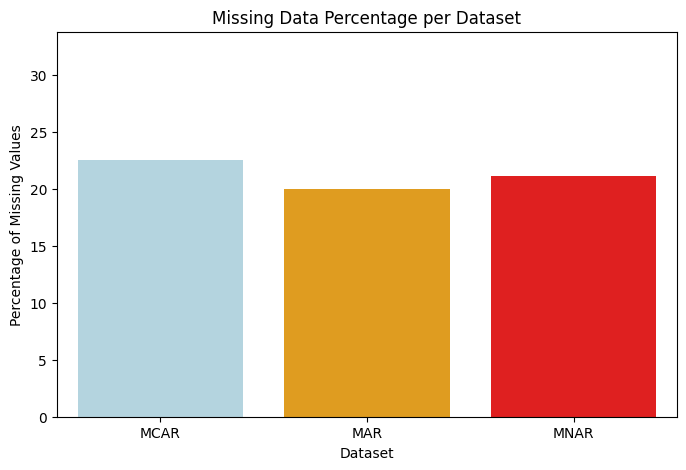

In [81]:
# Print statistics for each dataset
print("=" * 80)
print("BASIC STATISTICS")
print("=" * 80)

def dataset_statistics(df, name):
    total_entries = len(df)
    missing_values = df.isnull().sum().sum()
    missing_percentage = (missing_values * 100 / total_entries) if df.size > 0 else 0

    print(f"\n{name} Dataset:")
    print("-" * 50)
    print(f"Total entries: {total_entries}")
    print(f"Total missing values: {missing_values}")
    print(f"Missing value percentage: {missing_percentage:.2f}%")
    print(f"Mean of numeric columns:\n{df.mean(numeric_only=True)}\n")
    print(f"Median of numeric columns:\n{df.median(numeric_only=True)}\n")
    
# Print MCAR statistics
print("\nStatistics for MCAR:")
dataset_statistics(data_mcar, "MCAR")

# Print MAR statistics
print("\nStatistics for MAR:")
dataset_statistics(data_mar, "MAR")

# Print MNAR statistics
print("\nStatistics for MNAR:")
dataset_statistics(data_mnar, "MNAR")


# Visualizing missing values percentage
missing_data = pd.DataFrame({
    'Dataset': ['MCAR', 'MAR', 'MNAR'],
    'Missing %': [
        data_mcar.isnull().sum().sum() * 100 / len(data_mcar),
        data_mar.isnull().sum().sum() * 100 / len(data_mar),
        data_mnar.isnull().sum().sum() * 100 / len(data_mnar)
    ]
})

# Find the max missing percentage for dynamic y-axis scaling
max_missing = missing_data['Missing %'].max()

# Plot the missing data percentages
plt.figure(figsize=(8, 5))
sns.barplot(x='Dataset', y='Missing %', data=missing_data, palette=['lightblue', 'orange', 'red'])
plt.title('Missing Data Percentage per Dataset')
plt.ylim(0, max_missing * 1.5)  # Adjust y-axis to show relevant range
plt.ylabel('Percentage of Missing Values')
plt.show()